# International trade analysis

In this notebook, some methods of data exploration and visualization are shown based on data extracted from the world bank. We will show some ways of relating data, manage it and host it for future implementations. In particular, we use data of historical GDP growth series by country and international trade. Here are some relevant $\texttt{imports}$.

In [1]:
import folium
import json
import pandas as pd
import numpy as np
from mpl_toolkits.basemap import Basemap
import cartopy.crs as ccrs
import cartopy.io.shapereader as shpreader
import matplotlib.pyplot as plt

## 1 - GDP Growth

### 1.1 -  GDP Growth correlation between countries.

Growth correlation between pairs of countries were calculated for different non-random groups of countries like G20, Mercosur, North and South America, etc. For each group, average mean is shown. 

Main module and its details are presented below. 

In [2]:
from DICTS import DROPS_DICT, GROUP_DICT
from TOOLS import make_means, make_growth_data, world_mean

Where $\texttt{GROUP_DICT}$ is a python dictionary where countries groups as lists are hosted in it. $\texttt{DROP_DICT}$ corresponds to spurious data that we throw away.

In [3]:
df = pd.read_csv('growth_data.csv')
df = df.drop(columns = 'Unnamed: 64')

growth = make_growth_data(df, DROPS_DICT)

Raw data from World Bank hosted in a $\texttt{pandas}$ Data Frame is displayed below. This column-by-year structure is useless for our purpose. We will need to reshape this DataFrame in order to continue our analysis.

In [4]:
df.head(10)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
0,Aruba,ABW,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-3.685030,3.446055,-1.369863,4.198232,0.848228,-0.450586,-0.211225,1.330511,NaN,NaN
1,Afghanistan,AFG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,14.362441,0.426355,12.752287,5.600745,2.724543,1.451315,2.260314,2.665292,1.030660,NaN
2,Angola,AGO,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.859220,3.471981,8.542147,4.954590,4.822626,0.943576,-2.580097,-0.147207,-2.133493,NaN
3,Albania,ALB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,3.706881,2.545405,1.417526,1.001988,1.770000,2.230000,3.350000,3.836620,4.004413,NaN
4,Andorra,AND,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,-5.358826,-4.646543,-1.615218,0.351645,2.277683,0.842204,1.889124,1.724022,1.629345,NaN
5,Arab World,ARB,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,4.772079,3.629086,6.656678,3.166151,2.455201,3.307618,3.247325,0.999882,2.096747,NaN
6,United Arab Emirates,ARE,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,1.602810,6.930272,4.484626,5.053346,4.398697,5.064702,2.988442,0.790400,1.423840,NaN
7,Argentina,ARG,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,5.427843,-0.852022,-5.308197,10.130298,10.569433,...,10.125398,6.003952,-1.026420,2.405324,-2.512615,2.731160,-2.080328,2.668590,-2.514590,NaN
8,Armenia,ARM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,2.200000,4.700000,7.200000,3.300000,3.600000,3.200000,0.200000,7.500000,5.200000,NaN
9,American Samoa,ASM,GDP growth (annual %),NY.GDP.MKTP.KD.ZG,NaN,NaN,NaN,NaN,NaN,NaN,...,0.442478,0.293686,-4.392387,-2.756508,0.944882,1.248050,-2.619414,-5.379747,NaN,NaN


 $\texttt{make_growth_data}$ implementation is used for reshaping. A description is shown next: 

This function creates a new DataFrame where each country and its GDP growth is listed as a particular column by year. It also removes the spurious data. The output: 

In [5]:
growth.tail(10)

,year,Aruba,Afghanistan,Angola,Albania,Andorra,United Arab Emirates,Argentina,Armenia,American Samoa,...,"Venezuela, RB",Virgin Islands (U.S.),Vietnam,Vanuatu,Samoa,Kosovo,"Yemen, Rep.",South Africa,Zambia,Zimbabwe
50,2010,-3.685030,14.362441,4.859220,3.706881,-5.358826,1.602810,10.125398,2.2,0.442478,...,-1.488791,0.904116,6.423238,1.629082,0.479159,3.309575,7.702307,3.039731,10.298206,19.675323
51,2011,3.446055,0.426355,3.471981,2.545405,-4.646543,6.930272,6.003952,4.7,0.293686,...,4.176425,-8.158453,6.240303,1.223226,5.778544,4.812563,-12.714897,3.284168,5.564625,14.193913
52,2012,-1.369863,12.752287,8.542147,1.417526,-1.615218,4.484626,-1.026420,7.2,-4.392387,...,5.625957,-15.019255,5.247367,1.754750,0.402104,2.895349,2.392990,2.213355,7.597617,16.665429
53,2013,4.198232,5.600745,4.954590,1.001988,0.351645,5.053346,2.405324,3.3,-2.756508,...,1.343094,-5.830816,5.421883,1.969146,-1.933859,3.431230,4.823519,2.485201,5.059376,1.989493
54,2014,0.848228,2.724543,4.822626,1.770000,2.277683,4.398697,-2.512615,3.6,0.944882,...,-3.894386,-0.866218,5.983655,2.331006,1.396758,1.198071,-0.188690,1.846992,4.695826,2.376929
55,2015,-0.450586,1.451315,0.943576,2.230000,0.842204,5.064702,2.731160,3.2,1.248050,...,NaN,0.194175,6.679289,-0.801094,1.451065,4.094455,-16.678463,1.193733,2.919881,1.779873
56,2016,-0.211225,2.260314,-2.580097,3.350000,1.889124,2.988442,-2.080328,0.2,-2.619414,...,NaN,0.904393,6.210812,4.000574,7.169421,4.056579,-13.621458,0.399088,3.757178,0.755869
57,2017,1.330511,2.665292,-0.147207,3.836620,1.724022,0.790400,2.668590,7.5,-5.379747,...,NaN,-1.696543,6.812246,4.500680,2.704796,4.227909,-5.942320,1.414513,3.403169,4.704035
58,2018,NaN,1.030660,-2.133493,4.004413,1.629345,1.423840,-2.514590,5.2,NaN,...,NaN,NaN,7.075789,3.200000,0.724091,4.145372,-2.701475,0.787056,3.794901,6.159190
59,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


DataFrames of each group of countries are defined below using Panda's masks. 

In [4]:
growth_la, growth_na, growth_ms, growth_sa, growth_ca, growth_g20 = growth[GROUP_DICT['latin_america']], growth[GROUP_DICT['north_america']], growth[GROUP_DICT['mercosur']], growth[GROUP_DICT['south_america']], growth[GROUP_DICT['caribe']], growth[GROUP_DICT['g20']]

In [7]:
growth_la.tail(10)

,year,Argentina,Bolivia,Chile,Colombia,Ecuador,Peru,Paraguay,Uruguay,"Venezuela, RB",Costa Rica,Cuba,Dominican Republic,Guatemala,Honduras,Mexico,Nicaragua,Panama,Puerto Rico,El Salvador
50,2010,10.125398,4.126719,5.844177,4.347553,3.525299,8.332459,11.143736,7.803410,-1.488791,4.951864,2.390352,8.339651,2.869488,3.731140,5.118118,4.410099,5.827839,-0.413254,2.545756
51,2011,6.003952,5.204096,6.110919,7.362531,7.868141,6.327192,4.249111,5.162133,4.176425,4.307102,2.802301,3.133423,4.162049,3.835691,3.663008,6.316686,11.313732,-0.358511,3.815258
52,2012,-1.026420,5.122275,5.318628,3.903054,5.641962,6.139725,-0.538513,3.538179,5.625957,4.796920,3.014900,2.717368,2.969857,4.128688,3.642323,6.496137,9.778904,0.029275,2.814487
53,2013,2.405324,6.796012,4.045004,4.566870,4.946511,5.852518,8.417495,4.637539,1.343094,2.269027,2.747603,4.875205,3.697586,2.791560,1.354092,4.927094,6.903273,-0.306827,2.235638
54,2014,-2.512615,5.460567,1.766740,4.728312,3.788869,2.381938,4.860890,3.238791,-3.894386,3.515339,1.047577,7.636032,4.174169,3.058081,2.804340,4.785460,5.066743,-1.190363,1.711270
55,2015,2.731160,4.857188,2.303767,2.955946,0.098873,3.255890,3.080374,0.370741,NaN,3.631731,4.438142,7.033371,4.140044,3.840080,3.287992,4.792268,5.732764,-1.049444,2.395029
56,2016,-2.080328,4.263920,1.670540,2.087383,-1.226384,3.955882,4.312905,1.689798,NaN,4.245990,0.513761,6.612208,3.092483,3.892972,2.921615,4.563147,4.966420,-1.263003,2.507459
57,2017,2.668590,4.195209,1.279183,1.351327,2.368387,2.519089,4.958051,2.591339,NaN,3.397182,1.783498,4.551815,2.760338,4.788027,2.069715,4.675475,5.321230,-2.657393,2.307939
58,2018,-2.514590,4.223625,4.024653,2.658121,1.377127,3.976502,3.637827,1.620084,NaN,2.664050,NaN,6.950743,3.145000,3.745585,1.994207,-3.815710,3.677014,-4.905626,2.537632
59,2019,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Average correlation between pairs of countries are estimated using $\texttt{make_means}$:

Raw data is received as input. This function calculates the correlation matrix using Panda's $\texttt{DataFrame.corr()}$  and reshapes it using $\texttt{.stack()}$. The output is a three columns matrix whith each pair of countries in the group and its corresponding correlation. Finally, average correlation is estimated using $\texttt{.mean()}$. 

$\texttt{world_mean}$ calculates this average correlation for a random set of countries.  

Results are printed below. 

In [5]:
tolerance = 0
la_mean, na_mean, ms_mean, sa_mean, ca_mean, g20_mean = make_means(growth_la, tolerance), make_means(growth_na, tolerance), make_means(growth_ms, tolerance), make_means(growth_sa, tolerance), make_means(growth_ca, tolerance), make_means(growth_g20, tolerance)

print_string = 'GDP Growth correlation of '
print('\n', print_string + 'Latinoamérica:', la_mean, '\n')
print('\n', print_string + 'Norteamérica:', na_mean, '\n')
print('\n', print_string + 'Sudamérica:', sa_mean, '\n')
print('\n', print_string + 'Mercosur:',ms_mean, '\n')
print('\n', print_string + 'Caribe:',ca_mean, '\n')
print('\n', print_string + 'G20:',g20_mean, '\n')

n = 1000

mom = world_mean(growth, tolerance, n)
print('\n', print_string + 'the world:', mom, '\n')



 GDP Growth correlation of Latinoamérica: 0.20975391172014224 


 GDP Growth correlation of Norteamérica: 0.5396450702011809 


 GDP Growth correlation of Sudamérica: 0.2664629116612872 


 GDP Growth correlation of Mercosur: 0.2738941729096125 


 GDP Growth correlation of Caribe: 0.19460325782945373 


 GDP Growth correlation of G20: 0.20660146203940957 


 GDP Growth correlation of the world: 0.10028416668002745 



It can be easily seen that non-random-group correlation is significantly greater than the one calculated for a random-group. 

### 1.2 - Growth map

A nice method of data visualisation is presented. Data is printed on a political map of the world for a particular year. The most important thing to take in account is that coordinates and growth data has a unique ID for each country. 

We use a open source dictionary with world coordinates: 

In [6]:
with open('world-countries.json') as data_file:
   country_geo = json.load(data_file)

A dataframe for a given year is defined:

In [7]:
growth.index = growth.year
idx = 2000
growth_actual = pd.DataFrame(growth.loc[str(idx)])
growth_actual['Country'] = growth_actual.index
growth_actual = growth_actual.reset_index(drop= True)
growth_actual.drop([0], inplace = True)
growth_actual.rename(columns={str(idx): "growth"}, inplace = True)
print('\n', 'DGP growth by country on  '+ str(idx)+':','\n')
growth_actual.tail(10)


 DGP growth by country on  2000: 



,growth,Country
199,3.68694,"Venezuela, RB"
200,NaN,Virgin Islands (U.S.)
201,6.78732,Vietnam
202,5.92204,Vanuatu
203,6.91879,Samoa
204,NaN,Kosovo
205,6.18192,"Yemen, Rep."
206,4.2,South Africa
207,3.89732,Zambia
208,-3.05919,Zimbabwe


$\texttt{choropleth}$ method of $\texttt{Map()}$ class allows us to relate coordinates and growth data. $\texttt{folium}$ module has a HTML implemented interactive map.

In [8]:
fm = folium.Map(zoom_start =2)
 
# Add the color for the chloropleth:
fm.choropleth(
 geo_data=country_geo,
 name='choropleth',
 data=growth_actual,
 columns=['Country', 'growth'],
 key_on='properties.name',
 fill_color='YlGn',
 fill_opacity=0.7,
 line_opacity=0.4,
 legend_name='Growth Rate (%)'
)
fm.save('plot_data.html')
# Import the Folium interactive html file
from IPython.display import IFrame
IFrame(src= './plot_data.html', width=600 ,height=450)

C:\Users\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


## 2 - International trade

An implementation of network visualization is shown for international trades using International Services Trade data.

### 2.1 - Service Trades

In [12]:
from DICTS import places
from TOOLS import make_trades_map
from TOOLS import international_trades, mean_trade, inner_mean, make_dict

Where $\texttt{places}$ corresponds to a coordinates python dicionary.

In [13]:
df = pd.read_csv('trades_data.csv')
df = df[((df.Indicator == 'Commercial services imports by sector and partner – annual (2005-onwards)' )|(df.Indicator == 'Commercial services exports by sector and partner – annual (2005-onwards)'))&(df['Product/Sector'] == 'Commercial services')&(df.Year > 2009)]
df.sample(10)

C:\Users\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3051: DtypeWarning: Columns (3,5,18,19) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Indicator Category,Indicator Code,Indicator,Reporting Economy Code,Reporting Economy,Partner Economy Code,Partner Economy,Product/Sector Classification Code,Product/Sector Classification,Product/Sector Code,...,Period,Frequency Code,Frequency,Unit Code,Unit,Year,Value Flag Code,Value Flag,Text Value,Value
2287609,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,620,Portugal,036,Australia,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2017,NaN,NaN,NaN,24.792
2296668,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,620,Portugal,950,Africa,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2015,NaN,NaN,NaN,776.347
3511460,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,203,Czech Republic,380,Italy,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2017,NaN,NaN,NaN,724.360
4449804,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,643,Russian Federation,716,Zimbabwe,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2010,NaN,NaN,NaN,0.100
2677255,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,840,United States of America,566,Nigeria,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2016,NaN,NaN,NaN,399.000
2008413,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,392,Japan,000,World,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2016,NaN,NaN,NaN,184153.000
1528760,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,203,Czech Republic,710,South Africa,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2010,NaN,NaN,NaN,21.447
2386300,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,643,Russian Federation,324,Guinea,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2013,NaN,NaN,NaN,0.000
3208139,Trade in commercial services,ITS_CS_AX6,Commercial services exports by sector and part...,40,Austria,643,Russian Federation,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2014,NaN,NaN,NaN,1763.229
2425636,Trade in commercial services,ITS_CS_AM6,Commercial services imports by sector and part...,643,Russian Federation,612,Pitcairn,BOP6,Services - Extended Balance of Payments Classi...,SOX,...,Annual,A,Annual,USM,Million US dollar,2010,NaN,NaN,NaN,0.000


Time average of the amount of trades is calculated for each pair of countries. Resulting data is store in a python dictionary named  $\texttt{international_trades}$. We use $\texttt{make_dict}$, $\texttt{mean_trade}$ and $\texttt{inner_mean}$:

In [14]:
make_dict(df)

Using $\texttt{Basemap}$'s method $\texttt{get_path()}$ a path between two countries is drawn:

C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  after removing the cwd from sys.path.
C:\Users\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
  import sys


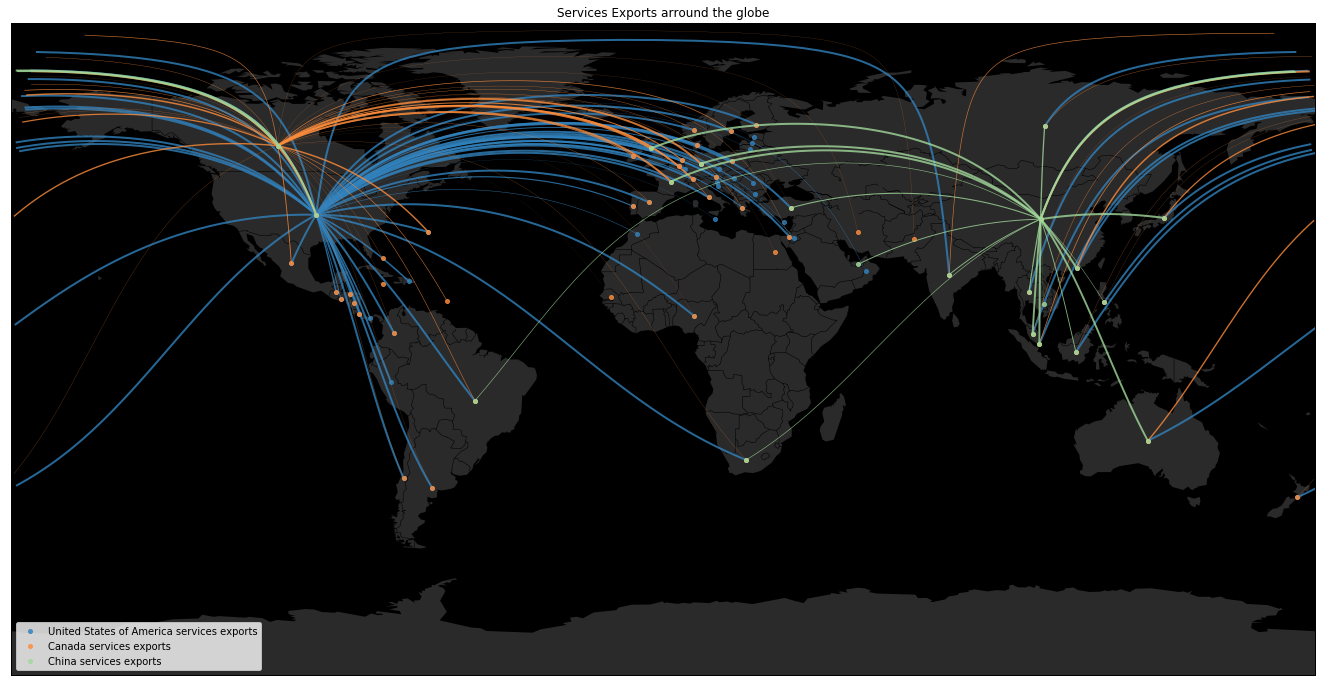

In [15]:
cmap = plt.cm.get_cmap('tab20c') 

plt.figure(figsize=(24,12))
m = Basemap(projection='cyl', lon_0=0, resolution='c')
m.fillcontinents(color='#2B2A2A',lake_color='#2B2A2A')
m.drawmapboundary(fill_color='black')
m.drawcountries(color="black")

network = np.load('international_trades.npy',allow_pickle='TRUE').item()

countries = ['United States of America', 'Canada', 'China']

make_trades_map(cmap, places, m, network, countries)
plt.title('Services Exports arround the globe')
plt.show()